In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # in order to scale data
from sklearn.metrics import classification_report,accuracy_score

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
print(data.head(10))
print(data.tail(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.Class.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

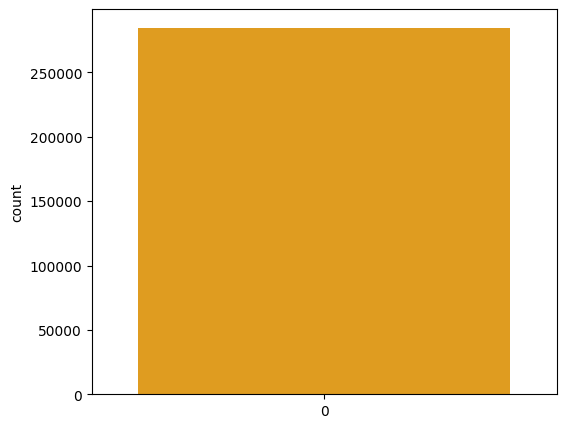

In [ ]:
plt.figure(figsize = (6,5))
sns.countplot(data.Class, color = "orange")
plt.show()

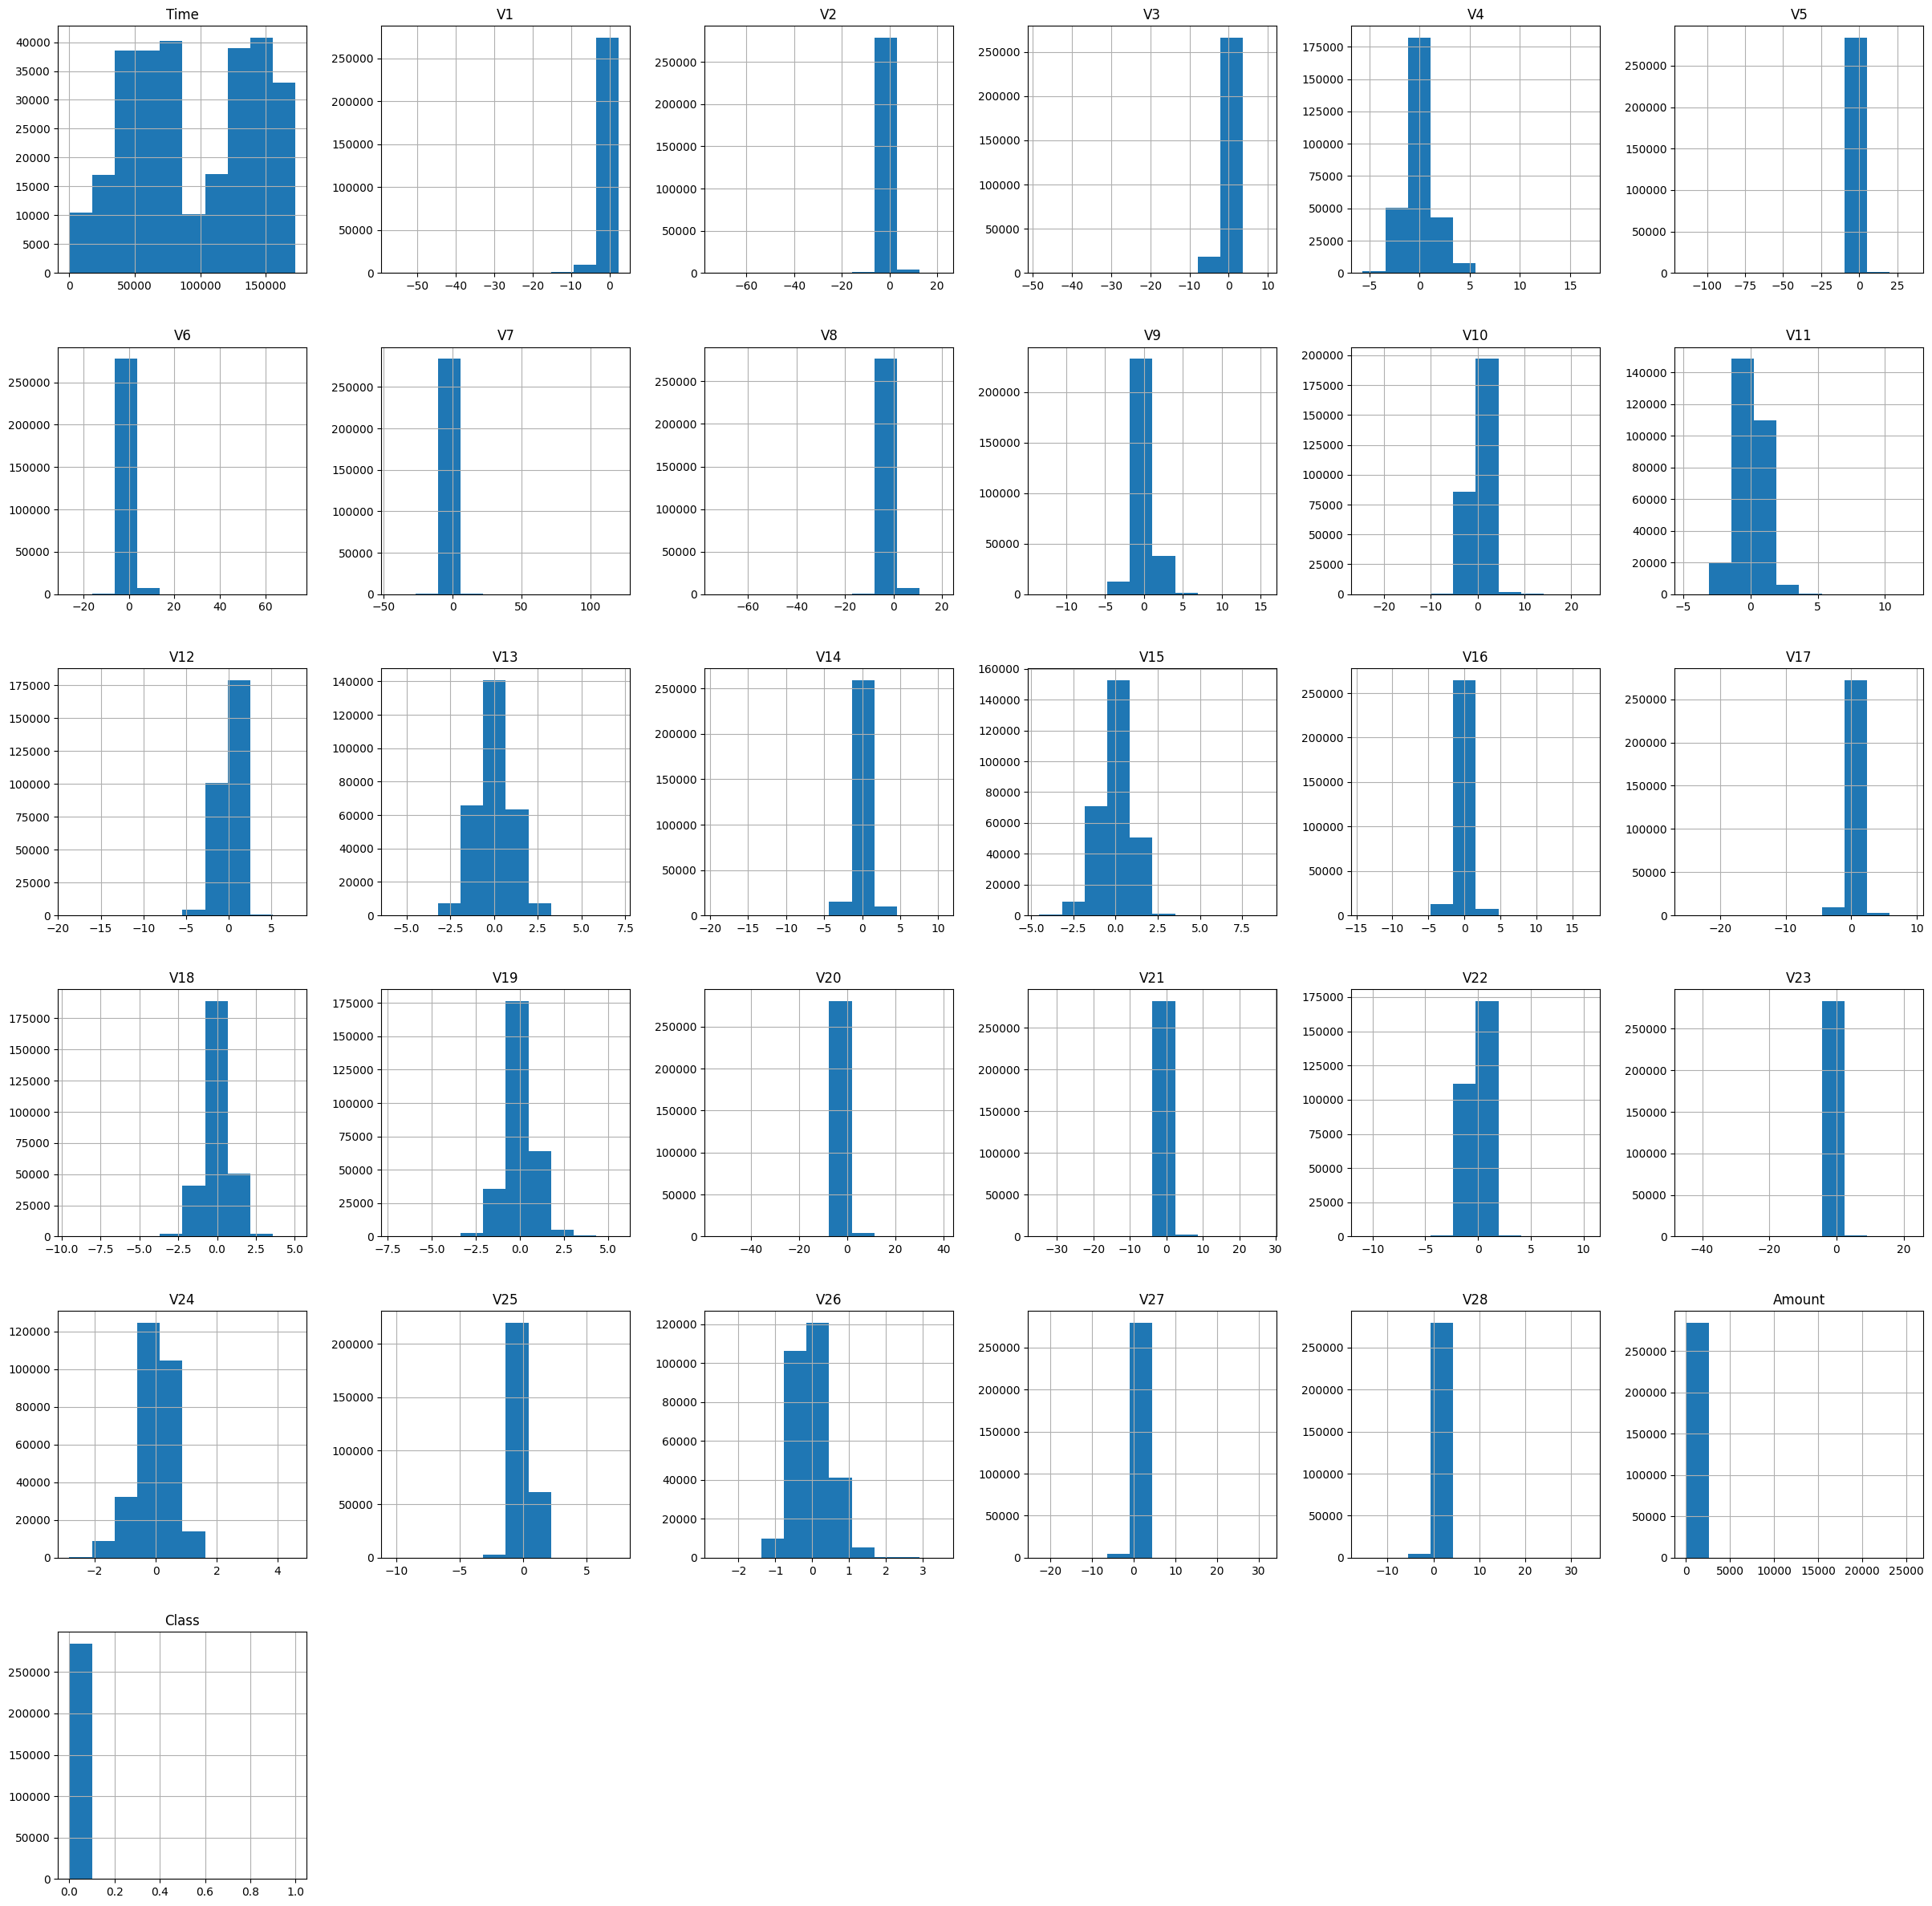

In [ ]:
data.hist(figsize=(30,30))
plt.show()

In [ ]:
fraud = data[data.Class == 1]

In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
non_fraud = data[data.Class == 0]
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print("Shape of fraud data:", fraud.shape)
print("Shape of non-fraus data:", non_fraud.shape)

Shape of fraud data: (492, 31)
Shape of non-fraus data: (284315, 31)


In [ ]:
nan_fraud_balanced = non_fraud.sample(4000)

In [ ]:
nan_fraud_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83678,59975.0,0.581793,-0.531472,-0.317964,0.875477,0.707745,1.545742,0.327422,0.416223,-0.516287,...,-0.092083,-0.708209,0.004882,-1.385045,0.024424,-0.636046,0.027245,0.037837,243.60,0
246381,153151.0,1.464086,-1.049860,-1.242045,0.944136,-0.697928,-1.224376,0.466543,-0.309960,0.748907,...,-0.081063,-0.774477,0.126781,0.372048,-0.425352,0.013161,-0.116336,-0.009138,285.95,0
146877,87938.0,-0.059598,0.726781,0.176950,-0.394757,1.162646,0.178674,0.754138,0.012914,-0.596303,...,-0.227191,-0.615204,-0.188819,-1.377767,-0.480702,0.391954,0.108254,0.141283,1.29,0
171436,120637.0,-4.418634,-4.793603,-2.206655,-1.386757,-3.293109,4.177283,4.930006,-0.733289,-0.307575,...,-0.933661,0.288451,2.071618,-0.886480,-0.606816,-0.637626,0.296493,1.488166,1255.01,0
62210,50181.0,-1.472782,-0.399319,1.339907,0.234526,1.807193,-1.685382,0.074935,-0.010738,-0.381370,...,0.220513,0.179036,-0.030879,0.014137,0.237120,-0.514395,0.050936,0.151369,6.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75258,55972.0,1.161289,0.117483,0.120674,0.473972,-0.078046,-0.109639,-0.151986,0.159413,-0.048587,...,-0.232347,-0.759597,0.104342,-0.376788,0.114929,0.128880,-0.020882,0.014429,17.99,0
283166,171416.0,-0.983129,1.118527,0.807654,-0.592103,0.512843,-0.307039,0.596126,0.426580,-1.048183,...,-0.203017,-0.759487,-0.312025,-0.455505,0.458035,0.415058,-0.153250,-0.049231,1.29,0
28909,35228.0,1.128625,-0.605220,-0.413160,-0.269146,1.380432,3.975877,-1.130939,1.057760,0.791660,...,-0.111024,-0.404277,-0.053723,1.042400,0.393369,0.326067,0.008684,0.030249,64.99,0
189366,128365.0,2.111148,-0.626452,-1.260147,-0.582487,-0.679219,-1.257458,-0.489725,-0.328902,-0.291709,...,0.129606,0.417972,0.124831,-0.014013,-0.111542,-0.211352,0.004360,-0.018566,45.55,0


In [ ]:
balanced_data = fraud.append(nan_fraud_balanced, ignore_index = True)
balanced_data     # 492 of them Class = 1 (fraud), 492 of them Class = 0 (nan_fraud)

<ipython-input-52-bb976a767615>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = fraud.append(nan_fraud_balanced, ignore_index = True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,55972.0,1.161289,0.117483,0.120674,0.473972,-0.078046,-0.109639,-0.151986,0.159413,-0.048587,...,-0.232347,-0.759597,0.104342,-0.376788,0.114929,0.128880,-0.020882,0.014429,17.99,0
4488,171416.0,-0.983129,1.118527,0.807654,-0.592103,0.512843,-0.307039,0.596126,0.426580,-1.048183,...,-0.203017,-0.759487,-0.312025,-0.455505,0.458035,0.415058,-0.153250,-0.049231,1.29,0
4489,35228.0,1.128625,-0.605220,-0.413160,-0.269146,1.380432,3.975877,-1.130939,1.057760,0.791660,...,-0.111024,-0.404277,-0.053723,1.042400,0.393369,0.326067,0.008684,0.030249,64.99,0
4490,128365.0,2.111148,-0.626452,-1.260147,-0.582487,-0.679219,-1.257458,-0.489725,-0.328902,-0.291709,...,0.129606,0.417972,0.124831,-0.014013,-0.111542,-0.211352,0.004360,-0.018566,45.55,0


In [ ]:
balanced_data.Class.value_counts()

0    4000
1     492
Name: Class, dtype: int64

In [ ]:
x = balanced_data.drop("Class", axis = 1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,55972.0,1.161289,0.117483,0.120674,0.473972,-0.078046,-0.109639,-0.151986,0.159413,-0.048587,...,-0.126210,-0.232347,-0.759597,0.104342,-0.376788,0.114929,0.128880,-0.020882,0.014429,17.99
4488,171416.0,-0.983129,1.118527,0.807654,-0.592103,0.512843,-0.307039,0.596126,0.426580,-1.048183,...,-0.074815,-0.203017,-0.759487,-0.312025,-0.455505,0.458035,0.415058,-0.153250,-0.049231,1.29
4489,35228.0,1.128625,-0.605220,-0.413160,-0.269146,1.380432,3.975877,-1.130939,1.057760,0.791660,...,0.137766,-0.111024,-0.404277,-0.053723,1.042400,0.393369,0.326067,0.008684,0.030249,64.99
4490,128365.0,2.111148,-0.626452,-1.260147,-0.582487,-0.679219,-1.257458,-0.489725,-0.328902,-0.291709,...,0.114367,0.129606,0.417972,0.124831,-0.014013,-0.111542,-0.211352,0.004360,-0.018566,45.55


In [ ]:
y = balanced_data.Class
y

0       1
1       1
2       1
3       1
4       1
       ..
4487    0
4488    0
4489    0
4490    0
4491    0
Name: Class, Length: 4492, dtype: int64

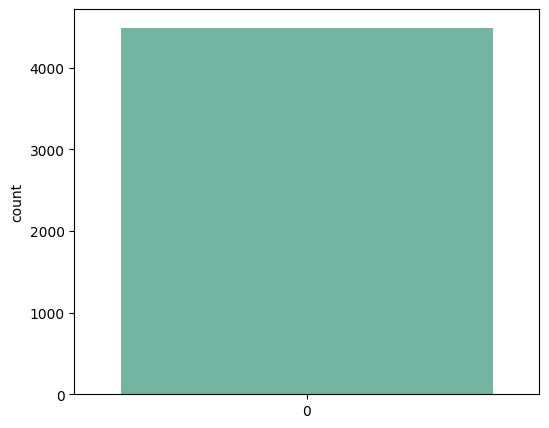

In [ ]:
plt.figure(figsize = (6,5))
sns.countplot(y, palette="Set2")
plt.show()

In [7]:
Scaler = StandardScaler()
data['scaled_amount'] = Scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = Scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
X = data.drop(columns=["Class"])
y = data["Class"]

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
xtrain.shape

(3593, 30)

In [ ]:
xtest.shape

(899, 30)

In [33]:
xtrain = tf.reshape(xtrain, (-1, 28, 28, 1))


InvalidArgumentError: ignored

In [26]:
ytrain = xtest = xtrain = np.expand_dims(ytrain, axis=-1)

In [20]:
xtest = xtrain = np.expand_dims(xtest, axis=-1)

In [ ]:
xtrain = np.reshape(data, (data.shape[0], 28, 28, 1))
xtest = np.reshape(data, (data.shape[0], 28, 28, 1))
xtrain, xtest

ValueError: ignored

In [40]:
model = Sequential()
model.add(Dense(32, input_shape=(30,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                992       
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 4)                

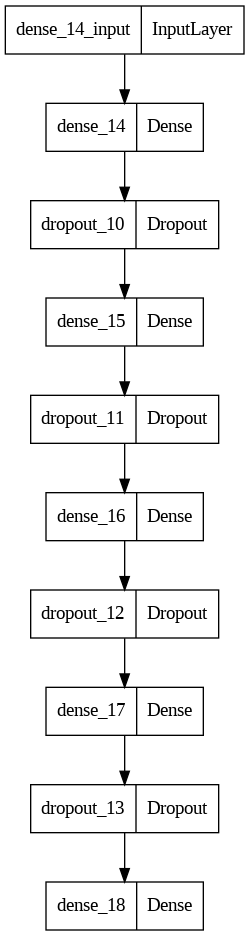

In [42]:
from keras.utils import plot_model
plot_model(model)

In [43]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32)

Epoch 1/10
7121/7121 [==============================] - 19s 2ms/step - loss: 0.0282 - accuracy: 0.9952
Epoch 2/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0065 - accuracy: 0.9989
Epoch 3/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0056 - accuracy: 0.9990
Epoch 4/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 5/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 6/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 7/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 8/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 9/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 10/10
7121/7121 [==============================] - 17s 2ms/step - l